In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/Salary Data.csv')

In [4]:
print("Dataset shape:", df.shape)

Dataset shape: (375, 6)


In [5]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [6]:
from sklearn.preprocessing import LabelEncoder

# Drop missing values

In [7]:
df = df.dropna()

# Encode categorical features

In [18]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

df['Gender'] = le1.fit_transform(df['Gender'])
df['Education Level'] = le2.fit_transform(df['Education Level'])
df['Job Title'] = le3.fit_transform(df['Job Title'])

In [19]:
print("After preprocessing:", df.shape)

After preprocessing: (373, 8)


In [20]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Education,Position
0,32.0,1,0,159,5.0,90000.0,0,159
1,28.0,0,1,17,3.0,65000.0,1,17
2,45.0,1,2,130,15.0,150000.0,2,130
3,36.0,0,0,101,7.0,60000.0,0,101
4,52.0,1,1,22,20.0,200000.0,1,22


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Salary

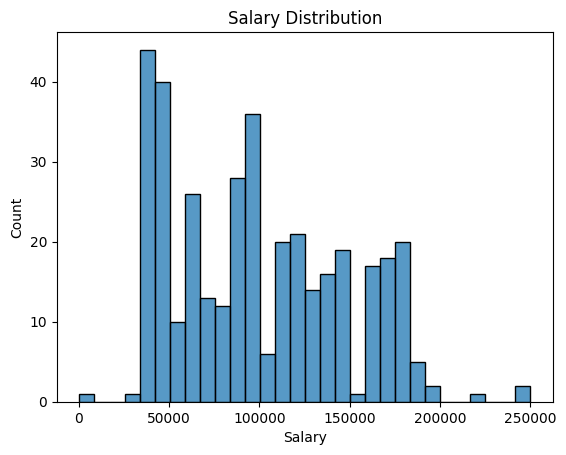

In [22]:
sns.histplot(df['Salary'], bins=30); plt.title('Salary Distribution'); plt.show()

# Correlation heatmap

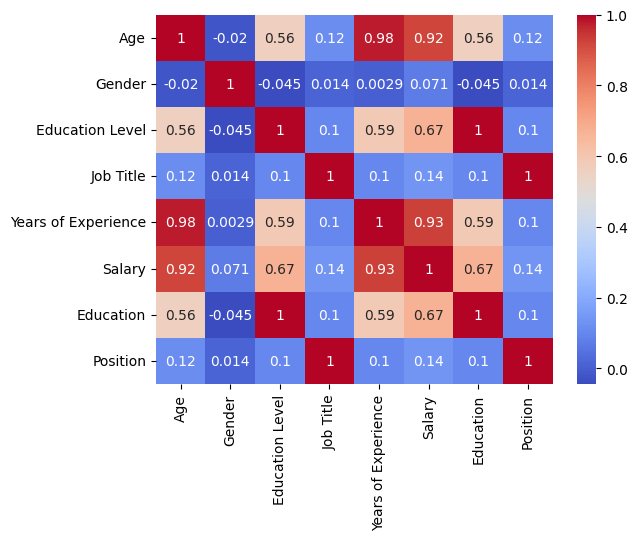

In [23]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm'); plt.show()

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop('Salary', axis=1)
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)

Train shape: (298, 7) | Test shape: (75, 7)


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
pd.DataFrame(X_train_scaled, columns=X.columns).describe()

,Age,Gender,Education Level,Job Title,Years of Experience,Education,Position
count,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02
mean,-4.649525e-16,-2.905953e-17,9.537486e-17,1.072967e-16,-3.576557e-17,9.537486e-17,1.072967e-16
std,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00
min,-1.918581e+00,-1.013514e+00,-7.273790e-01,-1.868384e+00,-1.545087e+00,-7.273790e-01,-1.868384e+00
25%,-7.807957e-01,-1.013514e+00,-7.273790e-01,-8.453250e-01,-9.302502e-01,-7.273790e-01,-8.453250e-01
50%,-2.119030e-01,9.866661e-01,-7.273790e-01,7.223778e-03,-1.617042e-01,-7.273790e-01,7.223778e-03
75%,9.258824e-01,9.866661e-01,6.710657e-01,9.610128e-01,7.605511e-01,6.710657e-01,9.610128e-01
max,2.205891e+00,9.866661e-01,2.069510e+00,1.797576e+00,2.297643e+00,2.069510e+00,1.797576e+00


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression

In [31]:
lr = LinearRegression().fit(X_train_scaled, y_train)

# Random Forest


In [32]:
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_scaled, y_train)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [35]:
def evaluate(model, name):
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE={rmse:.2f}, R²={r2:.3f}")

In [36]:
evaluate(lr, "Linear Regression")
evaluate(rf, "Random Forest")

Linear Regression: RMSE=15782.13, R²=0.896
Random Forest: RMSE=11919.25, R²=0.941


In [37]:
import pickle

In [38]:
with open('salary_model.pkl', 'wb') as f:
    pickle.dump((lr, scaler), f)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('Salary', axis=1)   # Replace 'Salary' with your actual target column
y = df['Salary']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [41]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = model.predict(X_test)

# Accuracy
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R² Score: 0.8961138207821866
Mean Absolute Error: 10928.921486231387


In [43]:
print(X_train.columns)

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Education', 'Position'],
      dtype='object')


In [44]:
import pandas as pd

test_cases = pd.DataFrame([
    [28, 1, 1, 3, 5, 1, 3],   # Test Case 1
    [35, 0, 2, 1, 8, 2, 1],   # Test Case 2
    [30, 1, 0, 2, 10, 0, 2],  # Test Case 3
    [26, 0, 1, 0, 3, 1, 0],   # Test Case 4
], columns=['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Education', 'Position'])

In [45]:
predicted_salaries = model.predict(test_cases)

for i, salary in enumerate(predicted_salaries):
    print(f"Test Case {i+1}: Predicted Salary = ${salary:.2f}")

Test Case 1: Predicted Salary = $63849.97
Test Case 2: Predicted Salary = $101777.73
Test Case 3: Predicted Salary = $66420.66
Test Case 4: Predicted Salary = $45305.04


In [48]:
import numpy as np

# Existing MAE and MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("🔍 Accuracy Metrics:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

🔍 Accuracy Metrics:
MAE  : 10928.92
MSE  : 249075656.43
RMSE : 15782.13
R2 Score: 0.8961


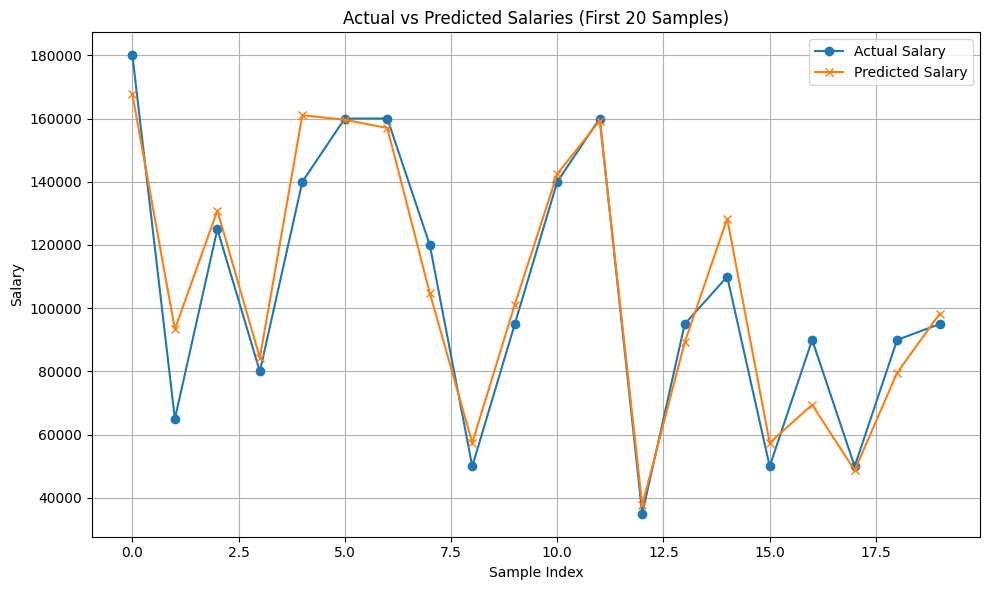

In [49]:
import matplotlib.pyplot as plt

# Compare Actual vs Predicted salaries
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:20], label='Actual Salary', marker='o')  # Only first 20 for clarity
plt.plot(y_pred[:20], label='Predicted Salary', marker='x')
plt.title('Actual vs Predicted Salaries (First 20 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

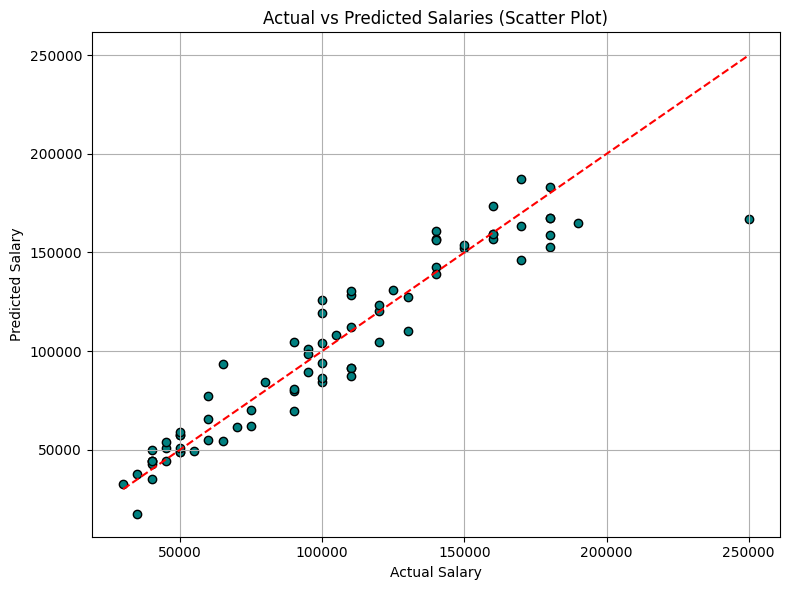

In [50]:
# Scatter plot: actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='teal', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salaries (Scatter Plot)')
plt.grid(True)
plt.tight_layout()
plt.show()